# 7.4 动量法

In [13]:
%matplotlib notebook
import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l
import torch
import numpy as np

eta = 0.4
print(torch.__version__)

1.5.0


## 7.4.1 梯度下降的问题

epoch 20, x1 -0.943467, x2 -0.000073


<IPython.core.display.Javascript object>


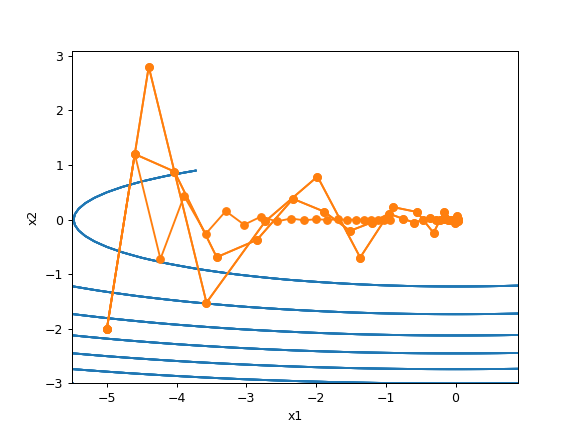

In [2]:
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))

In [3]:
train_xy = d2l.train_2d(gd_2d)
train_x = np.array([xy[0] for xy in train_xy])
train_y = np.array([xy[1] for xy in train_xy])
train_z = f_2d(train_x,train_y)
x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.5, 0.1))
z = f_2d(x1,x2)


epoch 20, x1 -0.943467, x2 -0.000073


<IPython.core.display.Javascript object>


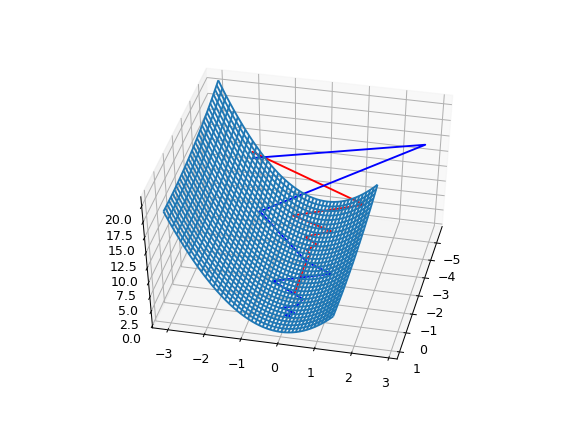

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x1, x2, z)
ax.plot(train_x,train_y,train_z,c = 'red')
# plt.show()

In [6]:
eta = 0.6
# d2l.show_trace_2d(f_2d, d2l.train_2d(gd_2d))
train_z += 1

## 7.4.2 动量法

epoch 20, x1 -0.062843, x2 0.001202


<IPython.core.display.Javascript object>


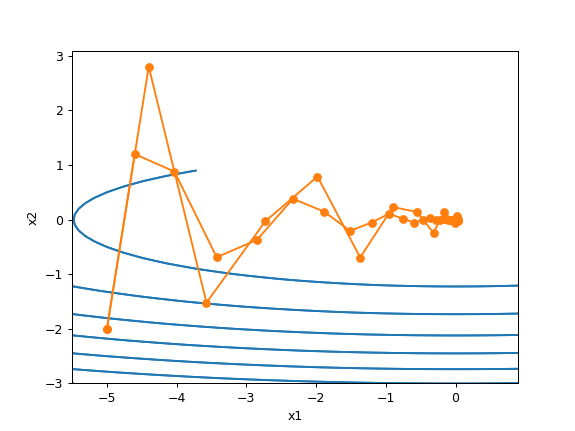

In [14]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

eta, gamma = 0.4, 0.5
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

In [15]:
eta = 0.6
d2l.show_trace_2d(f_2d, d2l.train_2d(momentum_2d))

epoch 20, x1 0.007188, x2 0.002553


In [17]:
train_xy = d2l.train_2d(momentum_2d)
train_x = np.array([xy[0] for xy in train_xy])
train_y = np.array([xy[1] for xy in train_xy])
train_z = f_2d(train_x,train_y)os.path.join
ax.plot(train_x,train_y,train_z,c = 'blue')

epoch 20, x1 0.007188, x2 0.002553


## 7.4.3 从零开始实现

In [18]:
features, labels = d2l.get_data_ch7()

def init_momentum_states():
    v_w = torch.zeros((features.shape[1], 1), dtype=torch.float32)
    v_b = torch.zeros(1, dtype=torch.float32)
    return (v_w, v_b)

def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        v.data = hyperparams['momentum'] * v.data + hyperparams['lr'] * p.grad.data
        p.data -= v.data

In [19]:
features.shape

torch.Size([1500, 5])

loss: 0.247369, 0.040711 sec per epoch


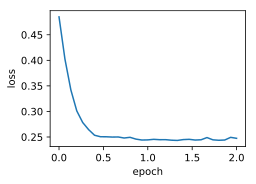

In [7]:
d2l.train_ch7(sgd_momentum, init_momentum_states(),
              {'lr': 0.02, 'momentum': 0.5}, features, labels)

In [ ]:
train_xy = d2l.train_2d(momentum_2d)
train_x = np.array([xy[0] for xy in train_xy])
train_y = np.array([xy[1] for xy in train_xy])
train_z = f_2d(train_x,train_y)
ax.plot(train_x,train_y,train_z,c = 'blue')

loss: 0.283397, 0.075622 sec per epoch


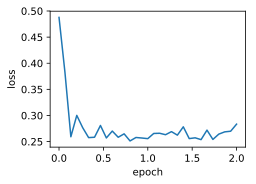

In [8]:
d2l.train_ch7(sgd_momentum, init_momentum_states(),
              {'lr': 0.02, 'momentum': 0.9}, features, labels)

loss: 0.242619, 0.045030 sec per epoch


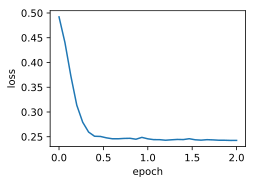

In [9]:
d2l.train_ch7(sgd_momentum, init_momentum_states(),
              {'lr': 0.004, 'momentum': 0.9}, features, labels)

## 7.4.4 简洁实现

loss: 0.253280, 0.060247 sec per epoch


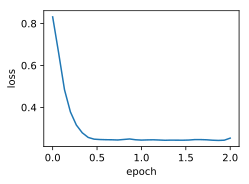

In [10]:
d2l.train_pytorch_ch7(torch.optim.SGD, {'lr': 0.004, 'momentum': 0.9},
                    features, labels)